In [1]:
# xmlrpc_client.ipynb

import xmlrpc.client
import pickle

server = xmlrpc.client.ServerProxy("http://localhost:8008")

print(server.system.listMethods())
print ('Ping:', server.ping())
print ('Server datetime:', server.now())
print ('View, type, value:', server.type(2))
print ('View, type, value:', server.type(2.))
print ('View, type, value:', server.type('My string'))
print ('View, type, value:', server.type("My string"))
print ('View, type, value:', server.type([1,2,3]))
print ('View, type, value:', server.type(["one", "two", "three"]))
print ('View, type, value:', server.type((1,2,"3")))
print ('Sum 2 + 3 :', server.sum(2, 3))
print ('Pow 2^3: ', server.pow(2, 3))

['black_list_check', 'black_list_check_by_name_and_birth', 'color_inversion', 'get_info_from_log', 'now', 'ping', 'pow', 'rotate_vertical', 'send_back_binary', 'sum', 'system.listMethods', 'system.methodHelp', 'system.methodSignature', 'threshold_img', 'type']
Ping: True
Server datetime: 20231010T14:28:44
View, type, value: ['2', "<class 'int'>", 2]
View, type, value: ['2.0', "<class 'float'>", 2.0]
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['[1, 2, 3]', "<class 'list'>", [1, 2, 3]]
View, type, value: ["['one', 'two', 'three']", "<class 'list'>", ['one', 'two', 'three']]
View, type, value: ["[1, 2, '3']", "<class 'list'>", [1, 2, '3']]
Sum 2 + 3 : 5
Pow 2^3:  8


In [9]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение

import xmlrpc.client

# Режим отображения внутри ноутбука
%matplotlib inline
gray()
img = Image.open('resources/11.bmp')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)

FileNotFoundError: [Errno 2] No such file or directory: '/resources/11.bmp'

<Figure size 640x480 with 0 Axes>

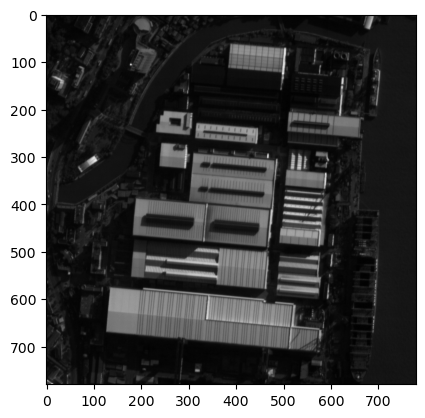

In [3]:
# Тест бинарной передачи данных

pimg = pickle.dumps(img_arr) # универсально

img_bin = xmlrpc.client.Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

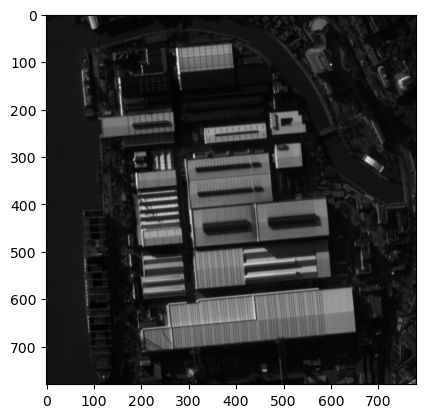

In [4]:

def send_to_server_aplly_func_get_res(img_arr_in, func, second_arg = None):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    if second_arg is None:
        img_bin2 = func(img_bin)
    else:
        img_bin2 = func(img_bin, second_arg)
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out
# Тест вращения по вертикали
img_arr_rotate = send_to_server_aplly_func_get_res(img_arr, server.rotate_vertical)
# Изображение после возрата с сервера
imshow(img_arr_rotate)

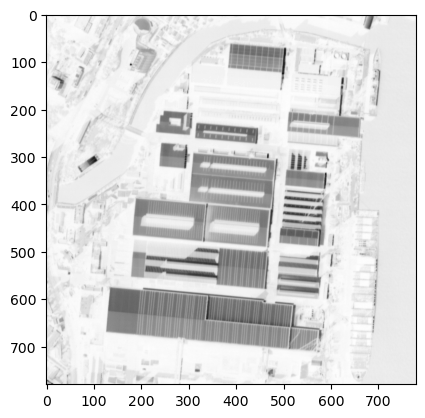

In [5]:

# Изображение с инверсией цвета
img_arr_inv = send_to_server_aplly_func_get_res(img_arr, server.color_inversion)

imshow(img_arr_inv)

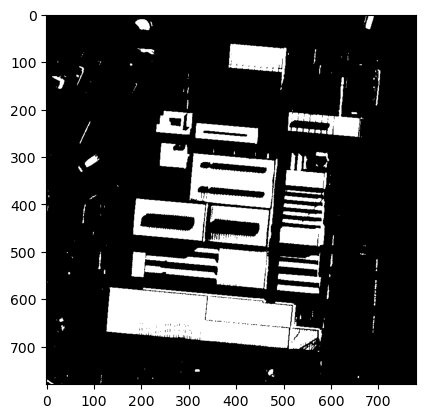

In [6]:
# Бинаризация по порогу
img_arr_inv = send_to_server_aplly_func_get_res(img_arr, server.threshold_img, 64)

imshow(img_arr_inv)

In [7]:
print(server.black_list_check_by_name_and_birth('Иванов','Иван','Иванович','22.03.1989'))
print(server.black_list_check_by_name_and_birth('Светлый','Иван','Иванович','22.03.1989'))
print(server.black_list_check_by_name_and_birth('Иванов','Иван','Гуревич','22.03.1989'))

Иванов Иван Иванович 22.03.1989: bad_boy
Светлый Иван Иванович 22.03.1989: good_boy
Иванов Иван Гуревич 22.03.1989: good_boy


In [8]:
print(server.get_info_from_log(''))
print(server.get_info_from_log('now','2023-09-26 19:20', '2023-09-26 19:21:00'))
print(server.get_info_from_log('','2023-09-26 19:20', '2023-09-26 19:21:00'))

show_type,2023-10-10 14:23:06
show_type,2023-10-10 14:23:10
test_sum,2023-10-10 14:23:14
test_pow,2023-10-10 14:23:18
send_back_binary,2023-10-10 14:23:24
rotate_vertical,2023-10-10 14:23:29
send_back_inversion,2023-10-10 14:23:34
threshold_img,2023-10-10 14:23:41
black_list_check_by_name_and_birth,2023-10-10 14:23:48
black_list_check_by_name_and_birth,2023-10-10 14:23:52
black_list_check_by_name_and_birth,2023-10-10 14:23:56


show_type,2023-10-10 14:23:06
show_type,2023-10-10 14:23:10
test_sum,2023-10-10 14:23:14
test_pow,2023-10-10 14:23:18
send_back_binary,2023-10-10 14:23:24
rotate_vertical,2023-10-10 14:23:29
send_back_inversion,2023-10-10 14:23:34
threshold_img,2023-10-10 14:23:41
black_list_check_by_name_and_birth,2023-10-10 14:23:48
black_list_check_by_name_and_birth,2023-10-10 14:23:52
black_list_check_by_name_and_birth,2023-10-10 14:23:56

